In [2]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics.utils.checks import collect_system_info

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
df = pd.read_csv('D:/Codes/Pycharm Projects/PYTORCH/PROJECTS/DATA/Churn data/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.drop('customerID', axis = 'columns', inplace = True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'], dtype=object)

**NOTICE** :- Here the Total charges are in strings so we have to convert them into numbers.

In [7]:
df.MonthlyCharges.values

array([      29.85,       56.95,       53.85, ...,        29.6,        74.4,      105.65])

In [8]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()].shape

(11, 20)

In [11]:
df.shape

(7043, 20)

In [12]:
df1 = df[df.TotalCharges!=" "]
df1.shape

(7032, 20)

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [58]:
# df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [15]:
df1.TotalCharges.dtype

dtype('float64')

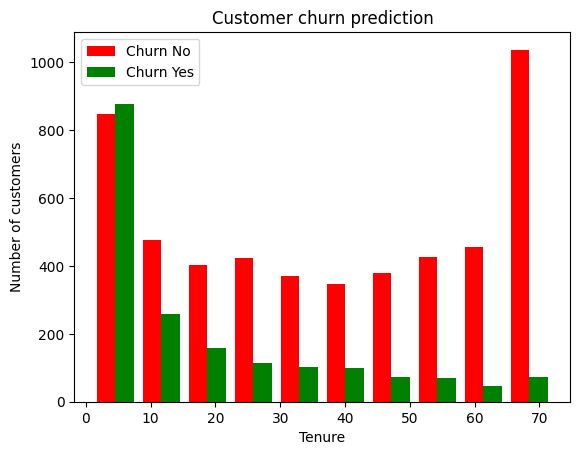

In [16]:
tenure_churn_no = df1[df1.Churn=="No"].tenure
tenure_churn_yes = df1[df1.Churn=="Yes"].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.title('Customer churn prediction')

plt.hist([tenure_churn_no, tenure_churn_yes], color =['red', 'green'], label = ['Churn No', 'Churn Yes'])
plt.legend()

The below code help's us get unique values for each column

In [17]:
def print_unique_values(df):
    for column in df:
        if df[column].dtypes == object:
            print(f'{column} : {df[column].unique()}')

print_unique_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)' 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [57]:
# df1.replace('No internet service', 'No', inplace=True)
# df1.replace('No phone service', 'No', inplace=True)

In [19]:
print_unique_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)' 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [56]:
# yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
#                   'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
#
# for column in yes_no_columns:
#     df1[column].replace({'Yes' : 1, "No" : 0}, inplace = True)

In [21]:
print_unique_values(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)' 'Credit card (automatic)']


In [22]:
for columns in df1:
    print(f"{columns} : {df1[columns].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)' 'Credit card (automatic)']
MonthlyCharges : [      29.85       56.95       53.85 ...        63.1        44.2        78.7]
TotalCharges : [      29.85      1889.5      108.15 ...      346.45       306.6      6844.5]
Churn : [0 1]


In [23]:
df1['gender'].replace({'Female' : 1, "Male" : 0}, inplace = True)

C:\Users\Sanket S Dharne\AppData\Local\Temp\ipykernel_16536\911633651.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female' : 1, "Male" : 0}, inplace = True)
C:\Users\Sanket S Dharne\AppData\Local\Temp\ipykernel_16536\911633651.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',

In [24]:
df1['gender'].unique()

array([1, 0])

In the below line of code we are ONE-HOT ENCODING the data

In [25]:
df2 = pd.get_dummies(data = df1, columns = ['InternetService', 'Contract', 'PaymentMethod'])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [26]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

Here we have used `MinMaxScaler()` to change the values ranging from say`1 - 50` `1-2000` etc. between `0-1`.

In [27]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [28]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
142,1,0,1,0,0.845070,1,1,0,1,0,...,False,True,False,False,False,True,True,False,False,False
5330,0,1,1,0,0.126761,1,0,0,1,1,...,False,True,False,True,False,False,False,False,False,True
6343,0,0,0,0,0.521127,1,0,0,0,0,...,False,False,True,False,True,False,False,False,False,True
6342,0,0,1,0,0.647887,1,1,0,1,1,...,False,True,False,True,False,False,False,False,True,False


In [29]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [30]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
X_train.shape

(5625, 26)

In [33]:
X_test.shape

(1407, 26)

In [34]:
y_train.shape

(5625,)

In [35]:
len(X_train.columns)

26

In [36]:
type(X_train)

pandas.core.frame.DataFrame

In [37]:
X_train.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
Contract_Month-to-month        

Converting data into TENSOR

In [38]:
X_train_type = X_train.astype('float32')
y_train_type = y_train.astype('float32')

X_test_type = X_test.astype('float32')
y_test_type = y_test.astype('float32')

In [39]:
X_train_type.dtypes

gender                                     float32
SeniorCitizen                              float32
Partner                                    float32
Dependents                                 float32
tenure                                     float32
PhoneService                               float32
MultipleLines                              float32
OnlineSecurity                             float32
OnlineBackup                               float32
DeviceProtection                           float32
TechSupport                                float32
StreamingTV                                float32
StreamingMovies                            float32
PaperlessBilling                           float32
MonthlyCharges                             float32
TotalCharges                               float32
InternetService_DSL                        float32
InternetService_Fiber optic                float32
InternetService_No                         float32
Contract_Month-to-month        

In [40]:
X_train_tensor = torch.tensor(X_train_type.values, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train_type.values, dtype = torch.float32)

X_test_tensor = torch.tensor(X_test_type.values, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test_type.values, dtype = torch.float32)

### Creating dataset and dataloader

In [41]:
X_train_tensor.shape, y_train_tensor.shape

(torch.Size([5625, 26]), torch.Size([5625]))

In [42]:
X_test_tensor.shape, y_test_tensor.shape

(torch.Size([1407, 26]), torch.Size([1407]))

In [43]:
from torch.utils.data import TensorDataset, DataLoader

y_train_tensor = y_train_tensor.view(-1, 1)
y_test_tensor = y_test_tensor.view(-1, 1)

# Creating DATASET
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Creating DATALOADER
train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size  = 64)

In [44]:
X_train_tensor.shape, y_train_tensor.shape

(torch.Size([5625, 26]), torch.Size([5625, 1]))

In [45]:
len(X_train_tensor), len(train_dataloader)

(5625, 88)

In [46]:
class Churn_Pred(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

In [47]:
input_dim = X_train_tensor.shape[1]
model = Churn_Pred(input_dim)
model.to(device)
model

Churn_Pred(
  (net): Sequential(
    (0): Linear(in_features=26, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [48]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)

def accuracy_fn(y_true, y_pred_logits):
    y_pred_probs = torch.sigmoid(y_pred_logits)
    y_pred = torch.round(y_pred_probs)

    correct = (y_true == y_pred).sum().item()
    acc = correct / len(y_true) * 100
    return acc


In [53]:
Epochs = 100

train_losses, test_losses = [], []

for epoch in range(Epochs):
    model.train()
    batch_train_losses = []

    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        y_logits = model(X)

        loss = loss_fn(y_logits, y)
        acc = accuracy_fn(y_true = y, y_pred_logits = y_logits)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_train_losses.append(loss.item())

    train_losses.append(sum(batch_train_losses)/len(batch_train_losses))

    model.eval()
    batch_test_losses = []
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)
            test_loss = loss_fn(test_pred_logits,y)
            test_acc = accuracy_fn(y_true = y, y_pred_logits = test_pred_logits)

            batch_test_losses.append(test_loss.item())

    test_losses.append(sum(batch_test_losses)/len(batch_test_losses))

    if epoch % 1 == 0:
        print(f"Number of Epochs : {epoch} | Train Loss : {loss: .5f} | Train Accuracy : {acc: .2f}% | Test loss : {test_loss: .5f} | Test Accuracy: {test_acc: .2f}%")

Number of Epochs : 0 | Train Loss :  0.45319 | Train Accuracy :  77.19% | Test loss :  0.43246 | Test Accuracy:  76.19%
Number of Epochs : 1 | Train Loss :  0.51785 | Train Accuracy :  77.19% | Test loss :  0.43332 | Test Accuracy:  76.19%
Number of Epochs : 2 | Train Loss :  0.42426 | Train Accuracy :  77.19% | Test loss :  0.43537 | Test Accuracy:  76.19%
Number of Epochs : 3 | Train Loss :  0.33416 | Train Accuracy :  84.21% | Test loss :  0.43472 | Test Accuracy:  76.19%
Number of Epochs : 4 | Train Loss :  0.34260 | Train Accuracy :  85.96% | Test loss :  0.43494 | Test Accuracy:  76.19%
Number of Epochs : 5 | Train Loss :  0.40173 | Train Accuracy :  84.21% | Test loss :  0.43433 | Test Accuracy:  76.19%
Number of Epochs : 6 | Train Loss :  0.44658 | Train Accuracy :  82.46% | Test loss :  0.43354 | Test Accuracy:  76.19%
Number of Epochs : 7 | Train Loss :  0.55069 | Train Accuracy :  78.95% | Test loss :  0.43624 | Test Accuracy:  76.19%
Number of Epochs : 8 | Train Loss :  0.3

In [50]:
from sklearn.metrics import classification_report, roc_auc_score

y_true = y.cpu().numpy()
y_pred_probs = torch.sigmoid(y_logits).cpu().numpy()
y_pred = (y_pred_probs > 0.5).astype(int)

print(classification_report(y_true, y_pred))
print("ROC-AUC:", roc_auc_score(y_true, y_pred_probs))

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

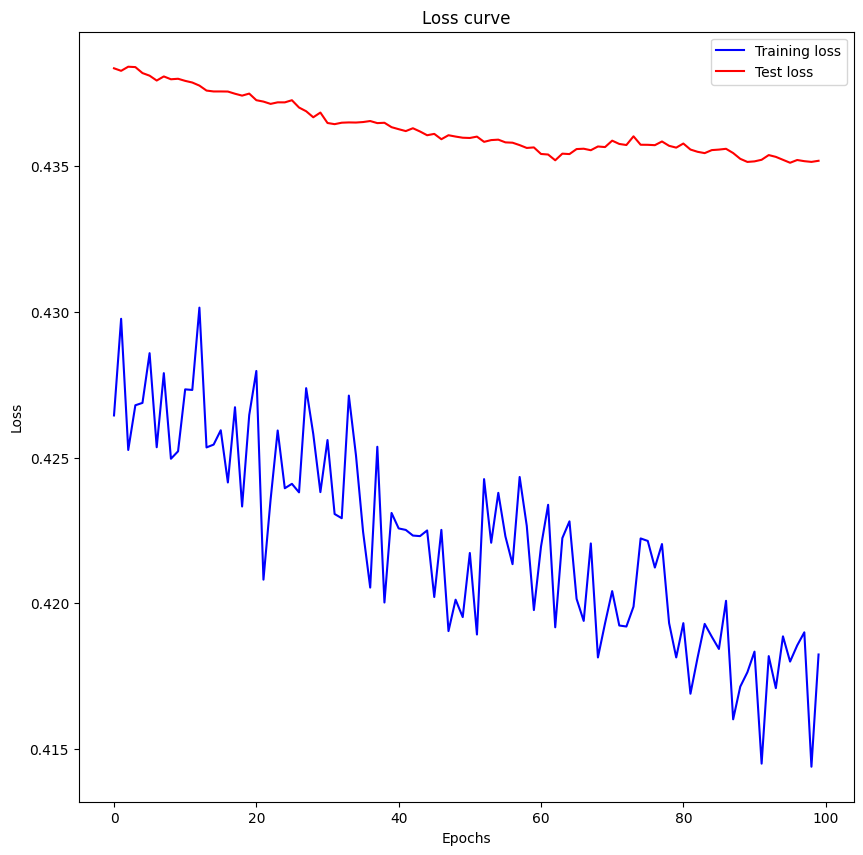

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.plot(train_losses, label = 'Training loss', color = 'blue')
plt.plot(test_losses, label = 'Test loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.legend()
plt.show()